In [1]:
from icecream import ic
from pyforest import *
import pyforest; pyforest.disable_javascript_update()
from lovely_numpy import lo

In [2]:
import random
import math
import re
import itertools
from collections import Counter
from functools import partial
from tqdm import trange
import pickle

# Move utils to head.
import hu_utils
import importlib
hu_utils = importlib.reload(hu_utils)
from sklearn.utils import shuffle

from skopt.learning import RandomForestRegressor as opt_RF
from skopt.learning import ExtraTreesRegressor as opt_ET
import sklearn.gaussian_process as gp
plt.style.use('classic')
import seaborn as sns
# sns.set_style('whitegrid')
import plt_configs; importlib.reload(plt_configs)

import shap

<IPython.core.display.Javascript object>

In [3]:
!pip install openpyxl


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from sklearn.model_selection import (
    cross_validate, train_test_split
)
from sklearn.ensemble import RandomForestRegressor

In [4]:
df_train = pd.read_excel("Original Data_ML_20220829.xlsx", engine = "openpyxl")

In [5]:
df_train = df_train[['Nucleophilic-HEA', 'Hydrophobic-BA', 'Acidic-CBEA',
       'Cationic-ATAC', 'Aromatic-PEA', 'Amide-AAm', 'Glass (kPa)']]
df_train.columns =['Nucleophilic-HEA', 'Hydrophobic-BA', 'Acidic-CBEA',
       'Cationic-ATAC', 'Aromatic-PEA', 'Amide-AAm', 'Glass (kPa)_max'] 

In [7]:
# df = pd.concat([df_train, df_dedup],axis=0, ignore_index=True)
df = df_train

In [8]:
df

Nucleophilic-HEA  Hydrophobic-BA  Acidic-CBEA  Cationic-ATAC  \
0                0.52            0.20         0.09           0.19   
1                0.42            0.41         0.17           0.00   
2                0.54            0.11         0.18           0.17   
3                0.22            0.20         0.09           0.17   
4                0.12            0.41         0.19           0.19   
..                ...             ...          ...            ...   
175              0.21            0.19         0.11           0.19   
176              0.00            0.29         0.24           0.39   
177              0.26            0.49         0.17           0.00   
178              0.55            0.20         0.16           0.00   
179              0.53            0.28         0.10           0.00   

     Aromatic-PEA  Amide-AAm  Glass (kPa)_max  
0            0.00       0.00            22.36  
1            0.00       0.00            12.57  
2            0.00       0.00            10.93  
3            0.32       0.00           126.82  
4            0.09       0.00           109.27  
..            ...        ...              ...  
175          0.00       0.30            12.97  
176          0.00       0.08            31.65  
177          0.00       0.07             8.32  
178          0.00       0.08             5.89  
179          0.00       0.08             1.19  

[180 rows x 7 columns]

In [9]:
df.to_csv('data/df_180.csv')

In [10]:
df = pd.read_csv('data/df_180.csv', index_col=0)

In [11]:
x_columns = ['Nucleophilic-HEA', 'Hydrophobic-BA', 'Acidic-CBEA', 'Cationic-ATAC',
       'Aromatic-PEA', 'Amide-AAm']
y_column = 'Glass (kPa)_max'

In [12]:
X = df.loc[:, x_columns]
y = df.loc[:, y_column]

In [13]:
X.shape, y.shape

((180, 6), (180,))

## Fit part.

In [14]:
### Do GridSearchCV for top 8 models
np.random.seed(0)
random.seed(0)
rs = 929

rmse_dict = dict()

In [15]:
# xgb ranges
range_depth = [6, 7, 8]
range_subsample = [0.8, 0.9, 1]
range_colsample = [0.8, 0.9, 1]
range_lr = [0.1, 0.05]

# Common ranges


# For debugging
debug = False
# debug_run = True
if debug:
    # xgb ranges
    range_depth = [3,4]
    range_subsample = [0.9, 1]
    range_colsample = [0.9, 1]
    range_lr = [0.1, 0.05]
ntree = 500

In [16]:
X.head()

Nucleophilic-HEA  Hydrophobic-BA  Acidic-CBEA  Cationic-ATAC  Aromatic-PEA  \
0              0.52            0.20         0.09           0.19          0.00   
1              0.42            0.41         0.17           0.00          0.00   
2              0.54            0.11         0.18           0.17          0.00   
3              0.22            0.20         0.09           0.17          0.32   
4              0.12            0.41         0.19           0.19          0.09   

   Amide-AAm  
0       0.00  
1       0.00  
2       0.00  
3       0.00  
4       0.00

### Utils

In [30]:
import hu_utils
import importlib
hu_utils = importlib.reload(hu_utils)
from sklearn.utils import shuffle

# ic(plt.rcParams['mathtext.default'])
# for k in plt.rcParams:
#     if k.find('tick')!=-1:
#         ic(k ,plt.rcParams[k])

### rf_cv, best_rf_cv, CV object setups and .fit()

In [18]:
rf_cv = hu_utils.setup_gridsearch_model('RFRsk')
rf_cv.fit(X, y)
ic(rf_cv.best_params_)

ic| rf_cv.best_params_: {'max_features': 1.0, 'max_leaf_nodes': 70, 'min_samples_leaf': 1}


{'max_features': 1.0, 'max_leaf_nodes': 70, 'min_samples_leaf': 1}

RMSE 7.434 (sd: 0.345, min:6.809, max:7.848, det:0.957) ... train
RMSE 19.066 (sd: 6.033, min:8.592, max:30.684, det:0.617) ... test


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, cursive
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


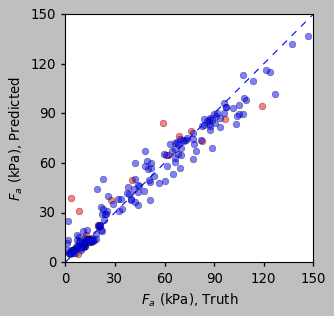

In [19]:
best_rf_cv = hu_utils.BestEstimatorCV(estimator=rf_cv.best_estimator_,
                                      X=X,
                                      y=y,
                                      cv=10)
# best_rf_cv.output_stats_difference()
best_rf_cv.output_stats()
best_rf_cv.plot_hold_out('hold_out_rf_180')
# best_rf_cv.plot_importance(X.columns, topk=6, fname='hold_out_rf_feature_importance')

In [20]:
rmse_dict['RFR'] = best_rf_cv.output_stats()[0]

RMSE 7.434 (sd: 0.345, min:6.809, max:7.848, det:0.957) ... train
RMSE 19.066 (sd: 6.033, min:8.592, max:30.684, det:0.617) ... test


### SHAP plot for RFR

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


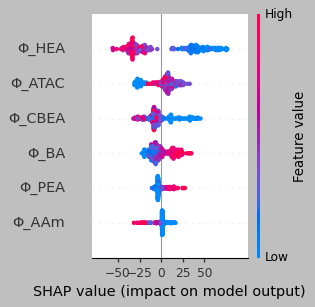

In [13]:
shap.initjs()
explainer = shap.TreeExplainer(rf_cv.best_estimator_)
X.columns = ['Φ_HEA','Φ_BA','Φ_CBEA','Φ_ATAC','Φ_PEA','Φ_AAm']
shap_values = explainer.shap_values(X)
# shap.summary_plot(shap_values, X, plot_type='bar') # Summary bar plot
shap.summary_plot(shap_values, X, show=False, plot_size=(4,4)) # Summary bee-swarm plot
# shap.summary_plot(shap_values, X, plot_type='layered_violin') # Summary bee-swarm plot
# shap.dependence_plot(3, shap_values, X)
# shap.force_plot(explainer.expected_value, shap_values, X)
# shap.plots.waterfall(explainer)
plt.xticks([-50,-25,0,25,50])
plt.savefig('shap/shap_summary_plot_180.pdf')



In [48]:
# X.iloc[:,3]

output_force_plot = shap.force_plot(explainer.expected_value, shap_values, X, show=False)
file ='force_plot.html'
shap.save_html(file, output_force_plot)
# lo(shap_values)
# lo(explainer.expected_value)

In [116]:
hu_utils.plot_shap_waterfall(rf_cv.best_estimator_, X, figsize=(4,4))

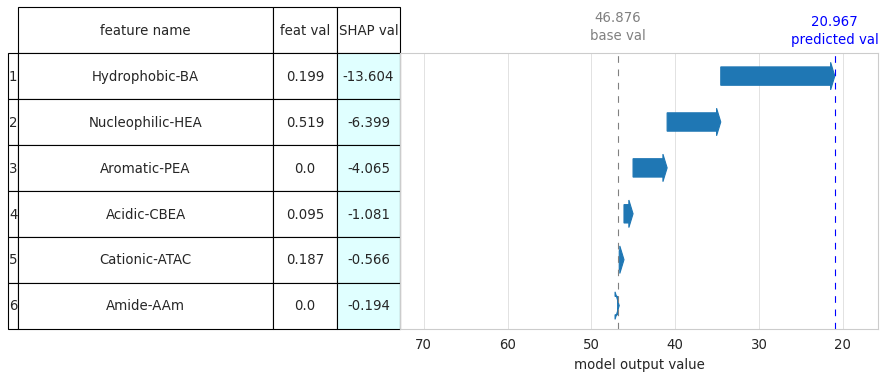

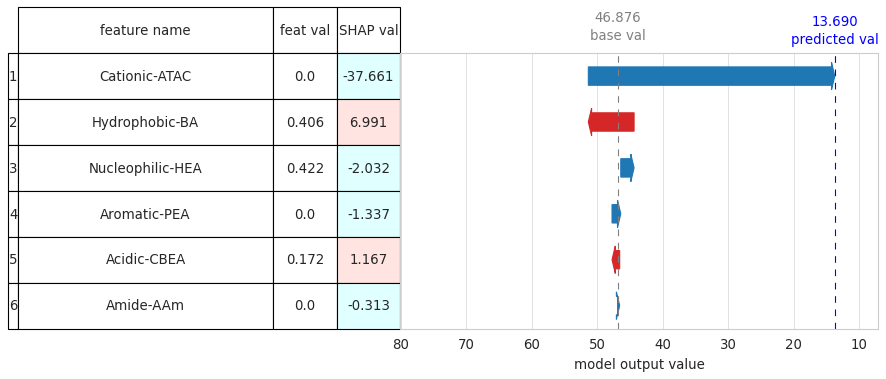

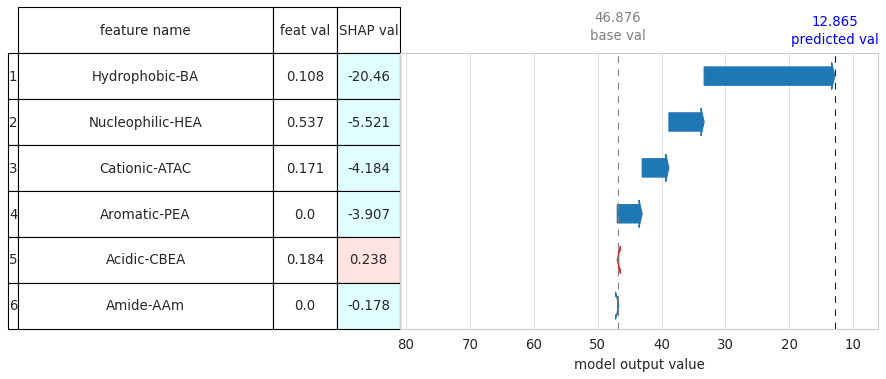

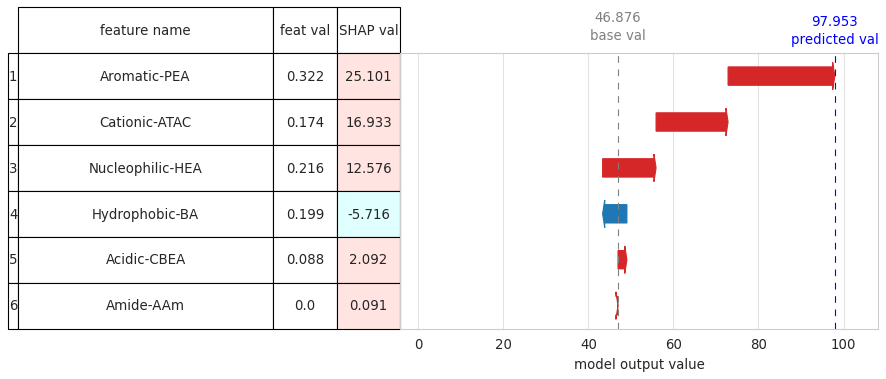

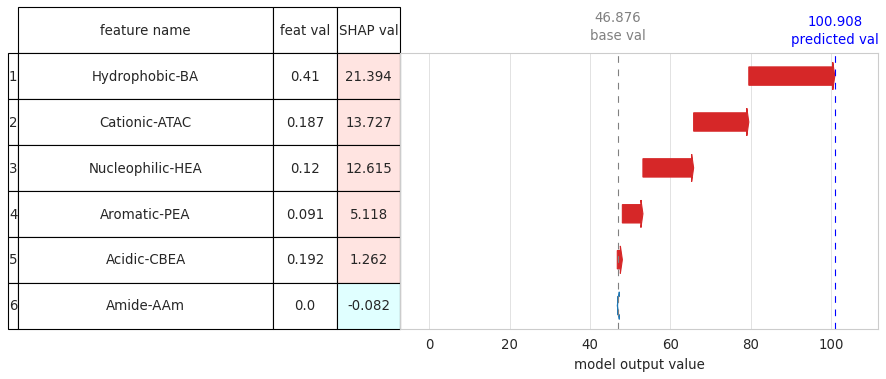

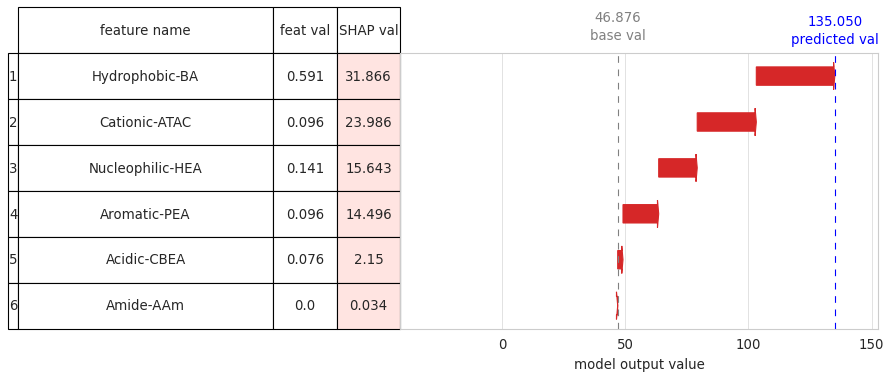

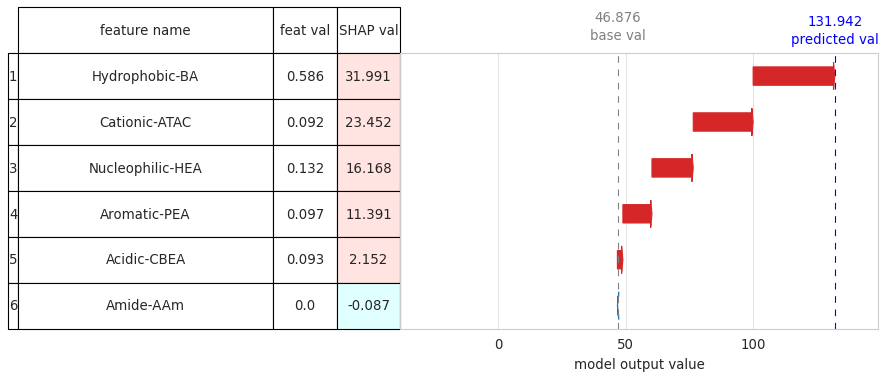

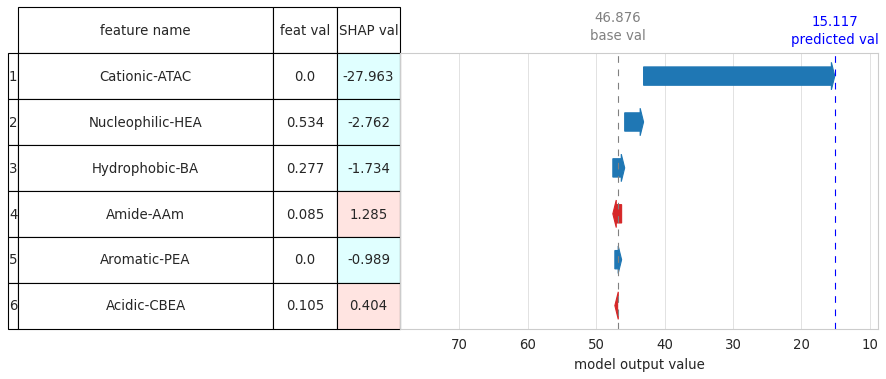

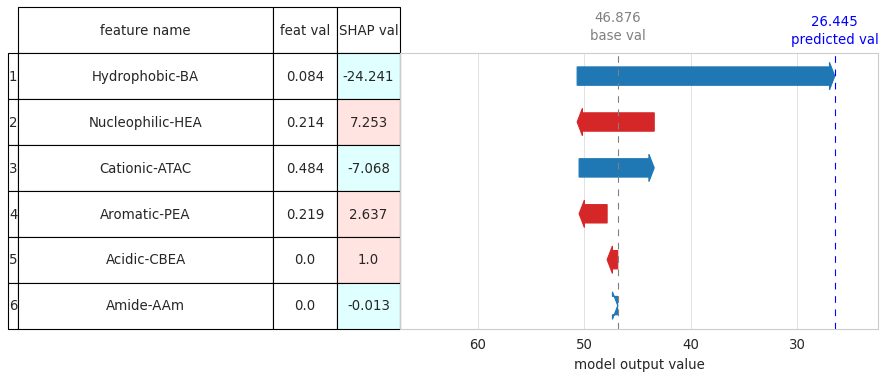

In [52]:
PATH = 'shap/'
import os
os.makedirs(PATH, exist_ok = True)
base_val = y.mean()
for i in range(5):
    cand_name = X.index[i]
    tmp = X.iloc[i, :].astype('float').to_frame()
    tmp.columns = ['val']
    tmp['shap'] = shap_values[i]
    hu_utils.plot_topshap(tmp, base_val, k=6, figsize = (17, 5), save=True) # Revoke the plot_topSHAP()
    plt.savefig(PATH + f'shap_{i}.pdf', bbox_inches='tight')

for i in [41, 106, 179, 85]:
    cand_name = X.index[i]
    tmp = X.iloc[i, :].astype('float').to_frame()
    tmp.columns = ['val']
    tmp['shap'] = shap_values[i]
    hu_utils.plot_topshap(tmp, base_val, k=6, figsize = (17, 5), save=True) # Revoke the plot_topSHAP()
    plt.savefig(PATH + f'shap_{i}.pdf', bbox_inches='tight')

### ETR

ic| etr_cv.best_params_: {'bootstrap': True,
                          'max_features': 1.0,
                          'max_leaf_nodes': 70,
                          'min_samples_leaf': 2}


RMSE 13.746 (sd: 0.487, min:12.619, max:14.204, det:0.854) ... train
RMSE 20.060 (sd: 5.666, min:11.924, max:32.136, det:0.604) ... test


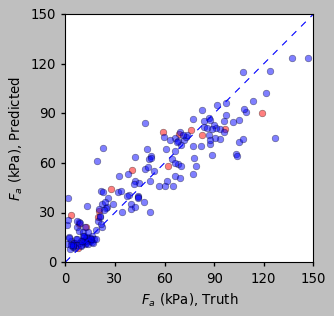

In [21]:
etr_cv = hu_utils.setup_gridsearch_model('ETR')
etr_cv.fit(X, y)
ic(etr_cv.best_params_)
best_etr_cv = hu_utils.BestEstimatorCV(estimator=etr_cv.best_estimator_,
                                       X=X,
                                       y=y,
                                       cv=10)
rmse_dict['ETR'] = best_etr_cv.output_stats()[0]
best_etr_cv.plot_hold_out('hold_out_etr_180')


ic| xgb_cv.best_params_: {'colsample_bytree': 1,
                          'learning_rate': 0.05,
                          'max_depth': 6,
                          'n_estimators': 200,
                          'subsample': 0.8}


RMSE 1.301 (sd: 0.122, min:1.152, max:1.509, det:0.999) ... train
RMSE 19.555 (sd: 5.697, min:10.633, max:29.507, det:0.606) ... test


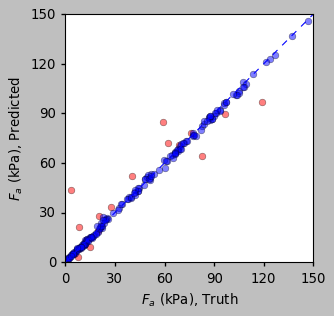

In [22]:
# Need 13 mins.
xgb_cv = hu_utils.setup_gridsearch_model('XGB')
xgb_cv.fit(X, y)
ic(xgb_cv.best_params_)
best_xgb_cv = hu_utils.BestEstimatorCV(estimator=xgb_cv.best_estimator_,
                                       X=X,
                                       y=y,
                                       cv=10)
rmse_dict['XGB'] = best_xgb_cv.output_stats()[0]
best_xgb_cv.plot_hold_out(f'hold_out_xgb_180')


ic| lasso_cv.best_params_: {'alpha': 0.1}


RMSE 30.366 (sd: 0.771, min:28.521, max:31.158, det:0.290) ... train
RMSE 31.185 (sd: 6.227, min:23.738, max:45.096, det:0.078) ... test


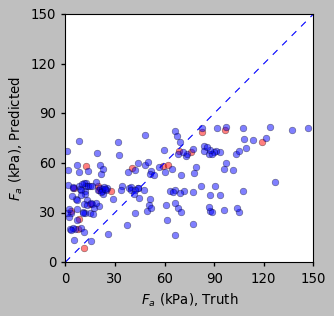

In [23]:
lasso_cv = hu_utils.setup_gridsearch_model('LASSO')
lasso_cv.fit(X, y)
ic(lasso_cv.best_params_)
best_lasso_cv = hu_utils.BestEstimatorCV(estimator=lasso_cv.best_estimator_,
                                       X=X,
                                       y=y,
                                       cv=10)
rmse_dict['Lasso'] = best_lasso_cv.output_stats()[0]
best_lasso_cv.plot_hold_out('hold_out_lasso_180')


ic| ridge_cv.best_params_: {'alpha': 1.0}


RMSE 30.880 (sd: 0.720, min:29.144, max:31.666, det:0.266) ... train
RMSE 31.483 (sd: 5.514, min:24.842, max:43.347, det:0.064) ... test


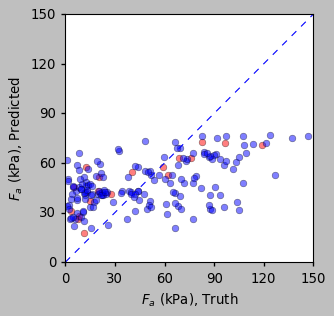

In [24]:
ridge_cv = hu_utils.setup_gridsearch_model('RIDGE')
ridge_cv.fit(X, y)
ic(ridge_cv.best_params_)
best_ridge_cv = hu_utils.BestEstimatorCV(estimator=ridge_cv.best_estimator_,
                                       X=X,
                                       y=y,
                                       cv=10)
best_ridge_cv.plot_hold_out(f'hold_out_ridge_180')
rmse_dict['Ridge'] = best_ridge_cv.output_stats()[0]


ic| krr_cv.best_params_: {'alpha': 0.01, 'gamma': 1.0}


RMSE 19.968 (sd: 0.355, min:19.261, max:20.445, det:0.693) ... train
RMSE 22.122 (sd: 4.047, min:16.507, max:30.757, det:0.515) ... test


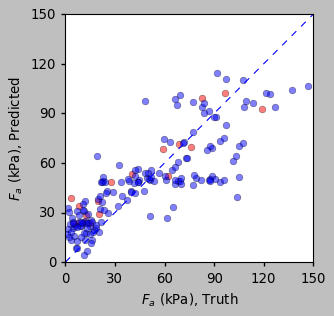

In [25]:
krr_cv = hu_utils.setup_gridsearch_model('KRR')
krr_cv.fit(X, y)
ic(krr_cv.best_params_)
best_krr_cv = hu_utils.BestEstimatorCV(estimator=krr_cv.best_estimator_,
                                       X=X,
                                       y=y,
                                       cv=10)
rmse_dict['KRR'] = best_krr_cv.output_stats()[0]
best_krr_cv.plot_hold_out(f'hold_out_krr_180')


ic| svr_cv.best_params_: {'C': 10000.0, 'epsilon': 0.01, 'gamma': 1.0}


RMSE 18.304 (sd: 0.514, min:17.163, max:18.786, det:0.742) ... train
RMSE 20.602 (sd: 4.963, min:13.360, max:30.755, det:0.564) ... test


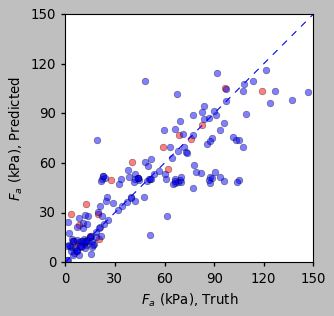

In [26]:
svr_cv = hu_utils.setup_gridsearch_model('SVR')
svr_cv.fit(X, y)
ic(svr_cv.best_params_)
best_svr_cv = hu_utils.BestEstimatorCV(estimator=svr_cv.best_estimator_,
                                       X=X,
                                       y=y,
                                       cv=10)
rmse_dict['SVR'] = best_svr_cv.output_stats()[0]
best_svr_cv.plot_hold_out(f'hold_out_svr_180')


ic| knn_cv.best_params_: {'n_neighbors': 4, 'p': 3}


RMSE 18.622 (sd: 0.646, min:17.595, max:19.530, det:0.733) ... train
RMSE 24.899 (sd: 4.205, min:16.384, max:32.295, det:0.424) ... test


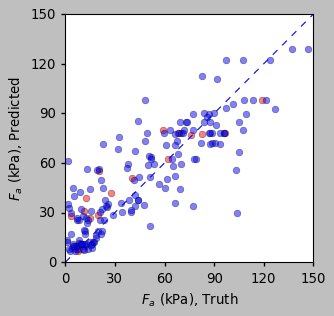

In [27]:
knn_cv = hu_utils.setup_gridsearch_model('KNN')
knn_cv.fit(X, y)
ic(knn_cv.best_params_)
best_knn_cv = hu_utils.BestEstimatorCV(estimator=knn_cv.best_estimator_,
                                       X=X,
                                       y=y,
                                       cv=10)
rmse_dict['KNN'] = best_knn_cv.output_stats()[0]
best_knn_cv.plot_hold_out(f'hold_out_knn_180')


In [193]:
# dummy_cv = hu_utils.setup_gridsearch_model('DUM')
# dummy_cv.fit(X, y)
# ic(dummy_cv.best_params_)
# best_dummpy_cv = hu_utils.BestEstimatorCV(estimator=dummy_cv.best_estimator_,
#                                        X=X,
#                                        y=y,
#                                        cv=10)
# best_dummpy_cv.output_stats()
# best_dummpy_cv.plot_hold_out(f'hold_out_dummy')


ic| dummy_cv.best_params_: {'strategy': 'mean'}


RMSE 36.054 (sd: 0.563, min:35.151, max:37.091, det:0.000) ... train
RMSE 36.111 (sd: 5.271, min:25.242, max:43.637, det:-0.190) ... test


In [32]:

# ret = {}
# ret[ "trn_mean" ] = 21.236  # 5 fold mean. It's different from the overal rmse.
# ret["trn_std"] = 3.455
# ret["tes_mean"] = 22.808
# ret["tes_std"] = 5.312
# rmse_dict['TabNet'] = ret

/home/user/miniconda3/envs/deep/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/home/user/miniconda3/envs/deep/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 4 of parameter k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/home/user/miniconda3/envs/deep/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 2 of parameter k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/home/user

RMSE 14.193 (sd: 0.655, min:12.645, max:15.060, det:0.845) ... train
RMSE 17.936 (sd: 4.845, min:8.594, max:27.976, det:0.668) ... test


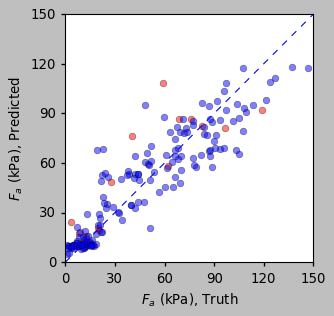

In [28]:
gp_cv = hu_utils.setup_gridsearch_model('GP')
gp_cv.fit(X, y)
ic(gp_cv.best_params_)
best_gp_cv = hu_utils.BestEstimatorCV(estimator=gp_cv.best_estimator_,
                                       X=X,
                                       y=y,
                                       cv=10)
# best_gp_cv.output_stats()
rmse_dict['GP'] = best_gp_cv.output_stats()[0]
best_gp_cv.plot_hold_out(f'hold_out_gp_180')


In [29]:
# Serialization.
with open('data/rmse_dict_180.pkl', 'wb') as f:
    pickle.dump(rmse_dict, f)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


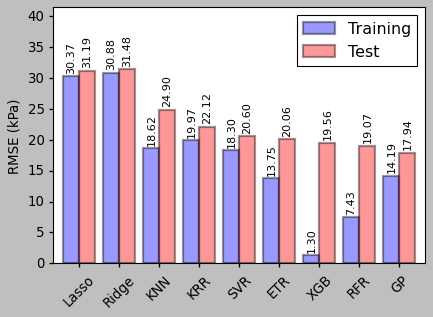

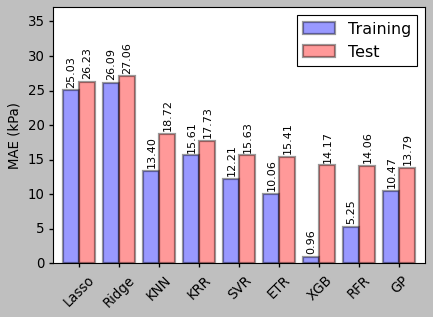

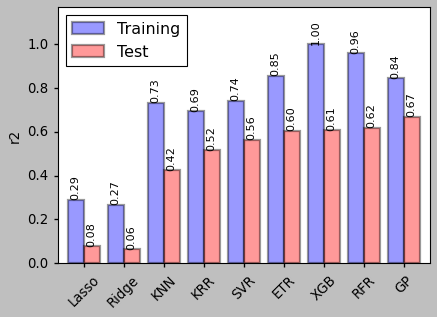

In [31]:
import os
from_scratch = os.path.exists('data/rmse_dict_180.pkl')
if not from_scratch:
    hu_utils.plot_compared_methods_rmse_180(rmse_dict, type='rmse', updated=True)
    hu_utils.plot_compared_methods_rmse_180(rmse_dict, type='mae', updated=True)
    hu_utils.plot_compared_methods_rmse_180(rmse_dict, type='r2', updated=True)
else:
    with open('data/rmse_dict_180.pkl', 'rb') as f:
        rmse_dict = pickle.load(f)
    hu_utils.plot_compared_methods_rmse_180(rmse_dict, type='rmse', updated=True)
    hu_utils.plot_compared_methods_rmse_180(rmse_dict, type='mae', updated=True)
    hu_utils.plot_compared_methods_rmse_180(rmse_dict, type='r2', updated=True)


### 2022/12/10 Hu used full training for exploration.

In [59]:
y.max()

353.2908704883227

In [48]:
import skopt


# hu_rf_model = etr_cv.best_estimator_
hu_rf_model = rf_cv.best_estimator_
# hu_rf_model = gp_cv.best_estimator_
y_neg = np.negative(y)
ic(y_neg[:10])
lo(y_neg[:10])
# Use 100% training set. I used it!
hu_rf_model.fit(X, y_neg)

lo(X)

ic| y_neg[:10]: 0    -22.36
                1    -12.57
                2    -10.93
                3   -126.82
                4   -109.27
                5     -7.19
                6    -39.97
                7    -77.57
                8    -11.04
                9    -77.00
                Name: Glass (kPa)_max, dtype: float64


     Nucleophilic-HEA  Hydrophobic-BA  Acidic-CBEA  Cationic-ATAC  \
0                0.52            0.20         0.09           0.19   
1                0.42            0.41         0.17           0.00   
2                0.54            0.11         0.18           0.17   
3                0.22            0.20         0.09           0.17   
4                0.12            0.41         0.19           0.19   
..                ...             ...          ...            ...   
284              0.05            0.57         0.02           0.06   
285              0.13            0.53         0.03           0.10   
286              0.05            0.55         0.02           0.09   
287              0.08            0.54         0.04           0.15   
288              0.03            0.55         0.03           0.07   

     Aromatic-PEA  Amide-AAm  
0            0.00       0.00  
1            0.00       0.00  
2            0.00       0.00  
3            0.32       0.00  
4            0.0

# Correlation Analysis (180)

### New data 20221031

In [ ]:
import seaborn as sns
df = pd.read_excel("Original Data_ML_20221129.xlsx", engine = "openpyxl", na_values='/', nrows=180)

<IPython.core.display.Javascript object>

In [ ]:
df.tail()

No.  Nucleophilic-HEA  Hydrophobic-BA  Acidic-CBEA  Cationic-ATAC  \
175  G-176          0.210159        0.189741     0.108316       0.192150   
176  G-177          0.000000        0.287179     0.240311       0.393044   
177  G-178          0.260572        0.493715     0.174109       0.000000   
178  G-179          0.554889        0.198569     0.163195       0.000000   
179  G-180          0.533687        0.277057     0.104623       0.000000   

     Aromatic-PEA  Amide-AAm  Glass (kPa)_10s  Glass (kPa)_60s  \
175           0.0   0.299634        12.965322              0.0   
176           0.0   0.079467        31.648974              0.0   
177           0.0   0.071603         8.322718              0.0   
178           0.0   0.083347         5.888181              0.0   
179           0.0   0.084634         1.188960              0.0   

     Steel (kPa)_10s  Steel (kPa)_60s         Q  Phase Seperation  \
175          0.00000              0.0  2.197000                 1   
176          0.00000              0.0  3.241792                 1   
177         20.49540              0.0  0.254037                 0   
178         15.56971              0.0  0.287496                 1   
179         20.89172              0.0  0.362976                 1   

     Modulus (kPa)     Tanδ      Slope  Log_Slope          G''    XlogP3  
175           3466  0.00997   1.633878   0.016820    34.556852 -0.350384  
176           2572  0.03250   1.163721   0.016291    83.590000 -0.557970  
177          10786  0.10900  57.092364   0.139697  1175.674000  0.680832  
178          11120  0.07810  22.380794   0.060166   868.472000  0.141413  
179          10168  0.13490  28.882961   0.082927  1371.663200  0.254984

In [ ]:
df.columns

Index(['No.', 'Nucleophilic-HEA', 'Hydrophobic-BA', 'Acidic-CBEA',
       'Cationic-ATAC', 'Aromatic-PEA', 'Amide-AAm', 'Glass (kPa)_10s',
       'Glass (kPa)_60s', 'Steel (kPa)_10s', 'Steel (kPa)_60s', 'Q',
       'Phase Seperation', 'Modulus (kPa)', 'Tanδ', 'Slope', 'Log_Slope',
       'G''', 'XlogP3'],
      dtype='object')

In [ ]:
x_columns = ['Nucleophilic-HEA', 'Hydrophobic-BA', 'Acidic-CBEA', 'Cationic-ATAC',
       'Aromatic-PEA', 'Amide-AAm']

y_column = 'Glass (kPa)'

# X = df.loc[:, x_columns]
# y = df.loc[:, y_column]
# x_columns_cov = x_columns + ['Glass (kPa)_10s']
# x_columns_cov = ['Glass (kPa)_10s', 'Q', 'Modulus (kPa)', 'Tanδ', 'Slope', 'Log_Slope']
x_columns_add = ['Glass (kPa)_10s', 'Q', 'Modulus (kPa)', 'Tanδ', 'Slope', 'XlogP3']
x_columns_cov = x_columns + x_columns_add
cov_new_names = ['Φ_HEA','Φ_BA','Φ_CBEA','Φ_ATAC','Φ_PEA','Φ_AAm'] + ['F_a', 'Q', "G'", "Tanδ", 'k', 'H']
X_cov = df.loc[:, x_columns_cov]
# temp = X_cov.to_numpy()
# X_cov = pd.DataFrame(temp, columns=cov_new_names)
X_cov.columns = cov_new_names

In [ ]:
X_cov.shape

(180, 7)

In [ ]:
x_columns_cov

['Nucleophilic-HEA',
 'Hydrophobic-BA',
 'Acidic-CBEA',
 'Cationic-ATAC',
 'Aromatic-PEA',
 'Amide-AAm',
 'Glass (kPa)_10s',
 'Q',
 'Modulus (kPa)',
 'Tanδ',
 'Slope',
 'XlogP3']

In [ ]:
prev_part = df.loc[:, x_columns]
X_cov = pd.concat([prev_part, X_cov],axis=1)


In [ ]:
X_cov.shape
X_cov.head()

Nucleophilic-HEA  Hydrophobic-BA  Acidic-CBEA  Cationic-ATAC  Aromatic-PEA  \
0              0.52            0.20         0.09           0.19          0.00   
1              0.42            0.41         0.17           0.00          0.00   
2              0.54            0.11         0.18           0.17          0.00   
3              0.22            0.20         0.09           0.17          0.32   
4              0.12            0.41         0.19           0.19          0.09   

   Amide-AAm    F_a    Q       G'  Tanδ    k     H  
0       0.00  22.36 2.52  5599.00  0.01 0.00 -0.31  
1       0.00  12.57 0.24 19219.00  0.16 0.12  0.53  
2       0.00  10.93 2.90  4555.00  0.00 0.01 -0.40  
3       0.00 126.82 1.19  8866.00  0.15 0.13  0.38  
4       0.00 109.27 1.10  7136.00  0.10 0.10  0.30

### sns.pairplot

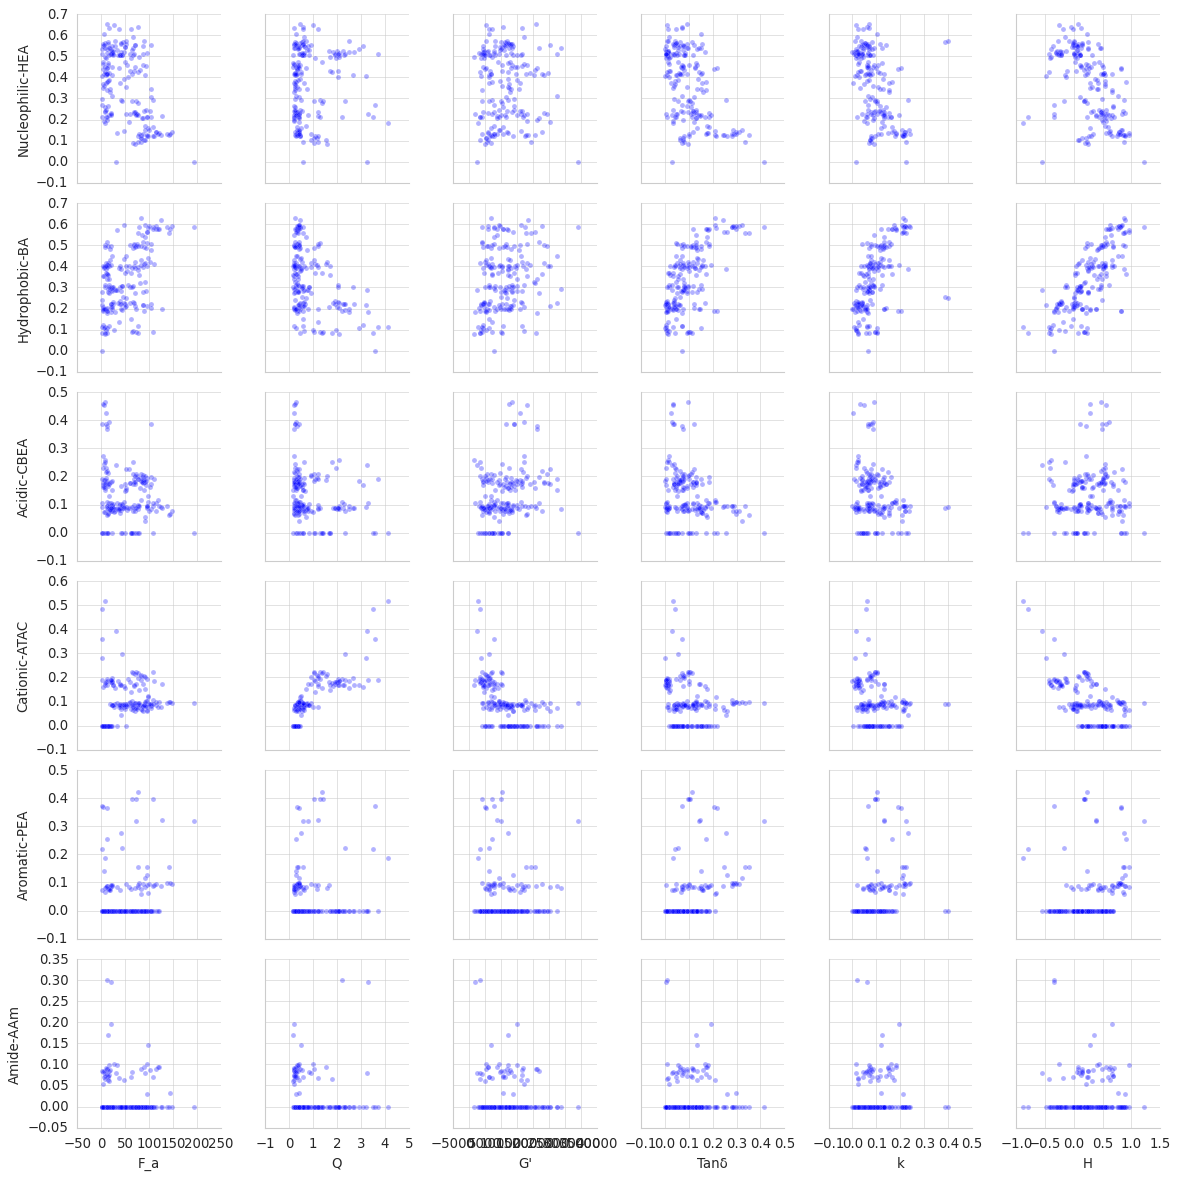

In [ ]:
sns.pairplot(data=X_cov, x_vars=["F_a", 'Q', "G'", "Tanδ", 'k', 'H'], y_vars=x_columns, kind='scatter', diag_kind=None, plot_kws={'alpha':0.3})
plt.savefig('corr-figs/pair_plot_6_properties.pdf')

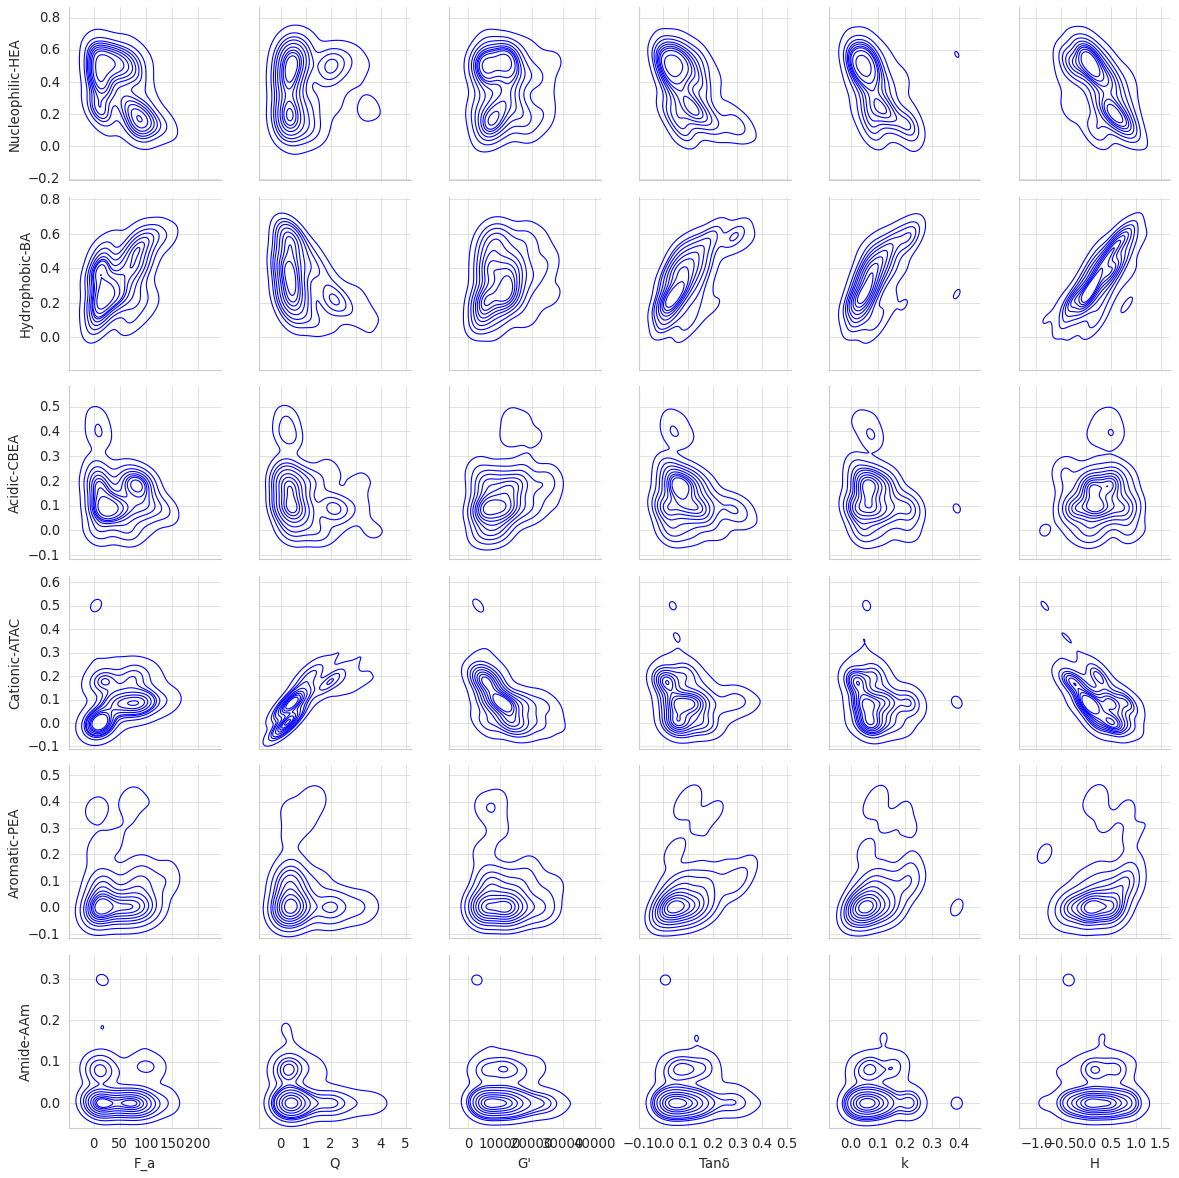

In [ ]:
import seaborn as sns
sns.pairplot(data=X_cov, x_vars=["F_a", 'Q', "G'", "Tanδ", 'k', 'H'], y_vars=x_columns, kind='kde', diag_kind=None, plot_kws={})
plt.savefig('corr-figs/pair_plot_6x6_kde.pdf')

In [ ]:
X_cov.corr()

Nucleophilic-HEA  Hydrophobic-BA  Acidic-CBEA  \
Nucleophilic-HEA          1.000000       -0.642389    -0.228474   
Hydrophobic-BA           -0.642389        1.000000     0.065599   
Acidic-CBEA              -0.228474        0.065599     1.000000   
Cationic-ATAC            -0.243104       -0.262214    -0.318098   
Aromatic-PEA             -0.210736       -0.248588    -0.384009   
Amide-AAm                -0.151530        0.015832    -0.079491   
Glass (kPa)_10s          -0.403097        0.408284    -0.115700   

                  Cationic-ATAC  Aromatic-PEA  Amide-AAm  Glass (kPa)_10s  
Nucleophilic-HEA      -0.243104     -0.210736  -0.151530        -0.403097  
Hydrophobic-BA        -0.262214     -0.248588   0.015832         0.408284  
Acidic-CBEA           -0.318098     -0.384009  -0.079491        -0.115700  
Cationic-ATAC          1.000000      0.238383  -0.104048         0.216328  
Aromatic-PEA           0.238383      1.000000  -0.106257         0.042726  
Amide-AAm             -0.104048     -0.106257   1.000000        -0.115886  
Glass (kPa)_10s        0.216328      0.042726  -0.115886         1.000000

In [ ]:
X_cov.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
X_cov.corr(method='kendall').style.background_gradient(cmap='coolwarm')

<AxesSubplot:>

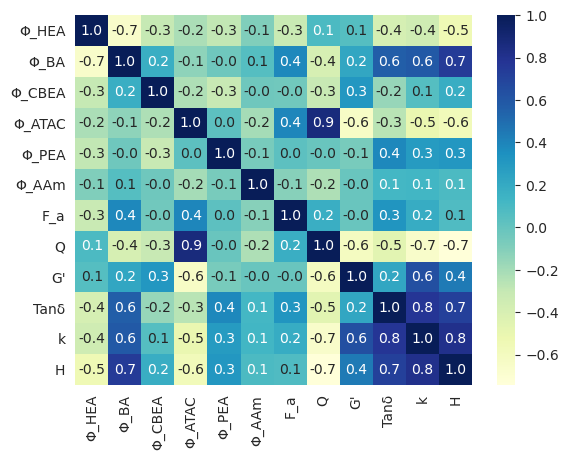

In [ ]:
corr_res = X_cov.corr(method='spearman')
sns.heatmap(data=corr_res, annot=True, cmap="YlGnBu", fmt='.1f')

In [ ]:
new_corr = corr_res.loc['F_a':'H', 'Φ_HEA':'F_a']
new_corr

Φ_HEA  Φ_BA  Φ_CBEA  Φ_ATAC  Φ_PEA  Φ_AAm   F_a
F_a   -0.31  0.38   -0.04    0.39   0.03  -0.11  1.00
Q      0.09 -0.39   -0.31    0.87  -0.01  -0.23  0.17
G'     0.06  0.22    0.31   -0.64  -0.06  -0.01 -0.01
Tanδ  -0.39  0.56   -0.16   -0.26   0.38   0.12  0.32
k     -0.35  0.59    0.06   -0.51   0.29   0.12  0.19
H     -0.54  0.74    0.18   -0.57   0.31   0.09  0.08

In [ ]:
corr_res = new_corr

In [ ]:
plt.style.use('default')
plt.style.use('seaborn-bright')
sns.set_style("whitegrid")
# corr_res = X_cov.corr(method='spearman')
mat = corr_res.stack().reset_index(name='correlation')

mat.to_csv('csv/pivoted_table_correlation.csv')


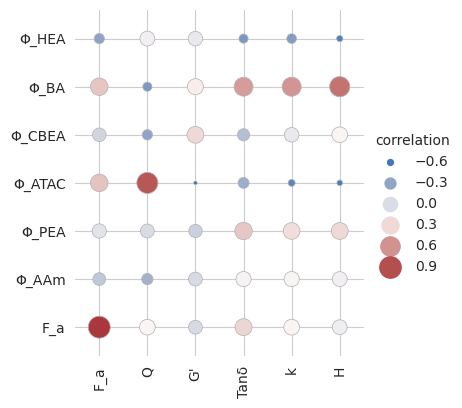

In [ ]:

g = sns.relplot(data=mat, x='level_0', y='level_1', hue='correlation', size='correlation', palette="vlag", hue_norm=(-0.68,1.0), edgecolor='.7', height=4, sizes=(0,250), size_norm=(-0.68, 1.0), legend='auto')
# g.ax.grid()
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.1)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
# sns.heatmap(data=corr_res, annot=True, cmap="YlGnBu", fmt='.1f')
plt.savefig('csv/corr_res_kendall.pdf', bbox_inches='tight')

In [ ]:
corr_res.to_csv('csv/corr_res_kendall.csv')

In [ ]:
X_cov.corr(method='spearman').style.background_gradient(cmap='coolwarm')

In [ ]:
X_cov.cov()

Nucleophilic-HEA  Hydrophobic-BA  Acidic-CBEA  \
Nucleophilic-HEA          0.025700       -0.014591    -0.003437   
Hydrophobic-BA           -0.014591        0.020074     0.000872   
Acidic-CBEA              -0.003437        0.000872     0.008804   
Cationic-ATAC            -0.003501       -0.003338    -0.002681   
Aromatic-PEA             -0.002998       -0.003126    -0.003198   
Amide-AAm                -0.001173        0.000108    -0.000360   
Glass (kPa)_10s          -2.338069        2.092950    -0.392784   

                  Cationic-ATAC  Aromatic-PEA  Amide-AAm  Glass (kPa)_10s  
Nucleophilic-HEA      -0.003501     -0.002998  -0.001173        -2.338069  
Hydrophobic-BA        -0.003338     -0.003126   0.000108         2.092950  
Acidic-CBEA           -0.002681     -0.003198  -0.000360        -0.392784  
Cationic-ATAC          0.008071      0.001901  -0.000451         0.703159  
Aromatic-PEA           0.001901      0.007877  -0.000455         0.137197  
Amide-AAm             -0.000451     -0.000455   0.002331        -0.202454  
Glass (kPa)_10s        0.703159      0.137197  -0.202454      1309.059087

In [ ]:
np.cov(X_cov.transpose())

array([[ 1.51788128e+03, -6.17360450e+00,  2.11314193e+04,
         1.60936499e+00,  8.18048421e+02,  1.03642743e+00],
       [-6.17360450e+00,  7.13006723e-01, -2.84510403e+03,
        -3.10095886e-02, -1.74663853e+01, -2.45791946e-02],
       [ 2.11314193e+04, -2.84510403e+03,  3.76646492e+07,
         1.10120353e+02,  1.73573635e+05,  6.77893585e+01],
       [ 1.60936499e+00, -3.10095886e-02,  1.10120353e+02,
         7.87484245e-03,  3.26229633e+00,  5.04211344e-03],
       [ 8.18048421e+02, -1.74663853e+01,  1.73573635e+05,
         3.26229633e+00,  2.69689810e+03,  2.43309225e+00],
       [ 1.03642743e+00, -2.45791946e-02,  6.77893585e+01,
         5.04211344e-03,  2.43309225e+00,  4.39049741e-03]])

In [ ]:
np.corrcoef(X_cov.transpose())

array([[ 1.        , -0.1876606 ,  0.08837772,  0.46549467,  0.40432244,
         0.40147928],
       [-0.1876606 ,  1.        , -0.54901521, -0.41383599, -0.39831252,
        -0.4393028 ],
       [ 0.08837772, -0.54901521,  1.        ,  0.20219932,  0.54460864,
         0.16670081],
       [ 0.46549467, -0.41383599,  0.20219932,  1.        ,  0.70789721,
         0.85750135],
       [ 0.40432244, -0.39831252,  0.54460864,  0.70789721,  1.        ,
         0.70708145],
       [ 0.40147928, -0.4393028 ,  0.16670081,  0.85750135,  0.70708145,
         1.        ]])

In [ ]:

x_columns = ['Nucleophilic-HEA', 'Hydrophobic-BA', 'Acidic-CBEA', 'Cationic-ATAC',
       'Aromatic-PEA', 'Amide-AAm']
x_columns.extend(x_columns_cov)
x_columns
X_all_cov = df.loc[:, x_columns]
X_all_cov.corr().style.background_gradient(cmap='coolwarm')

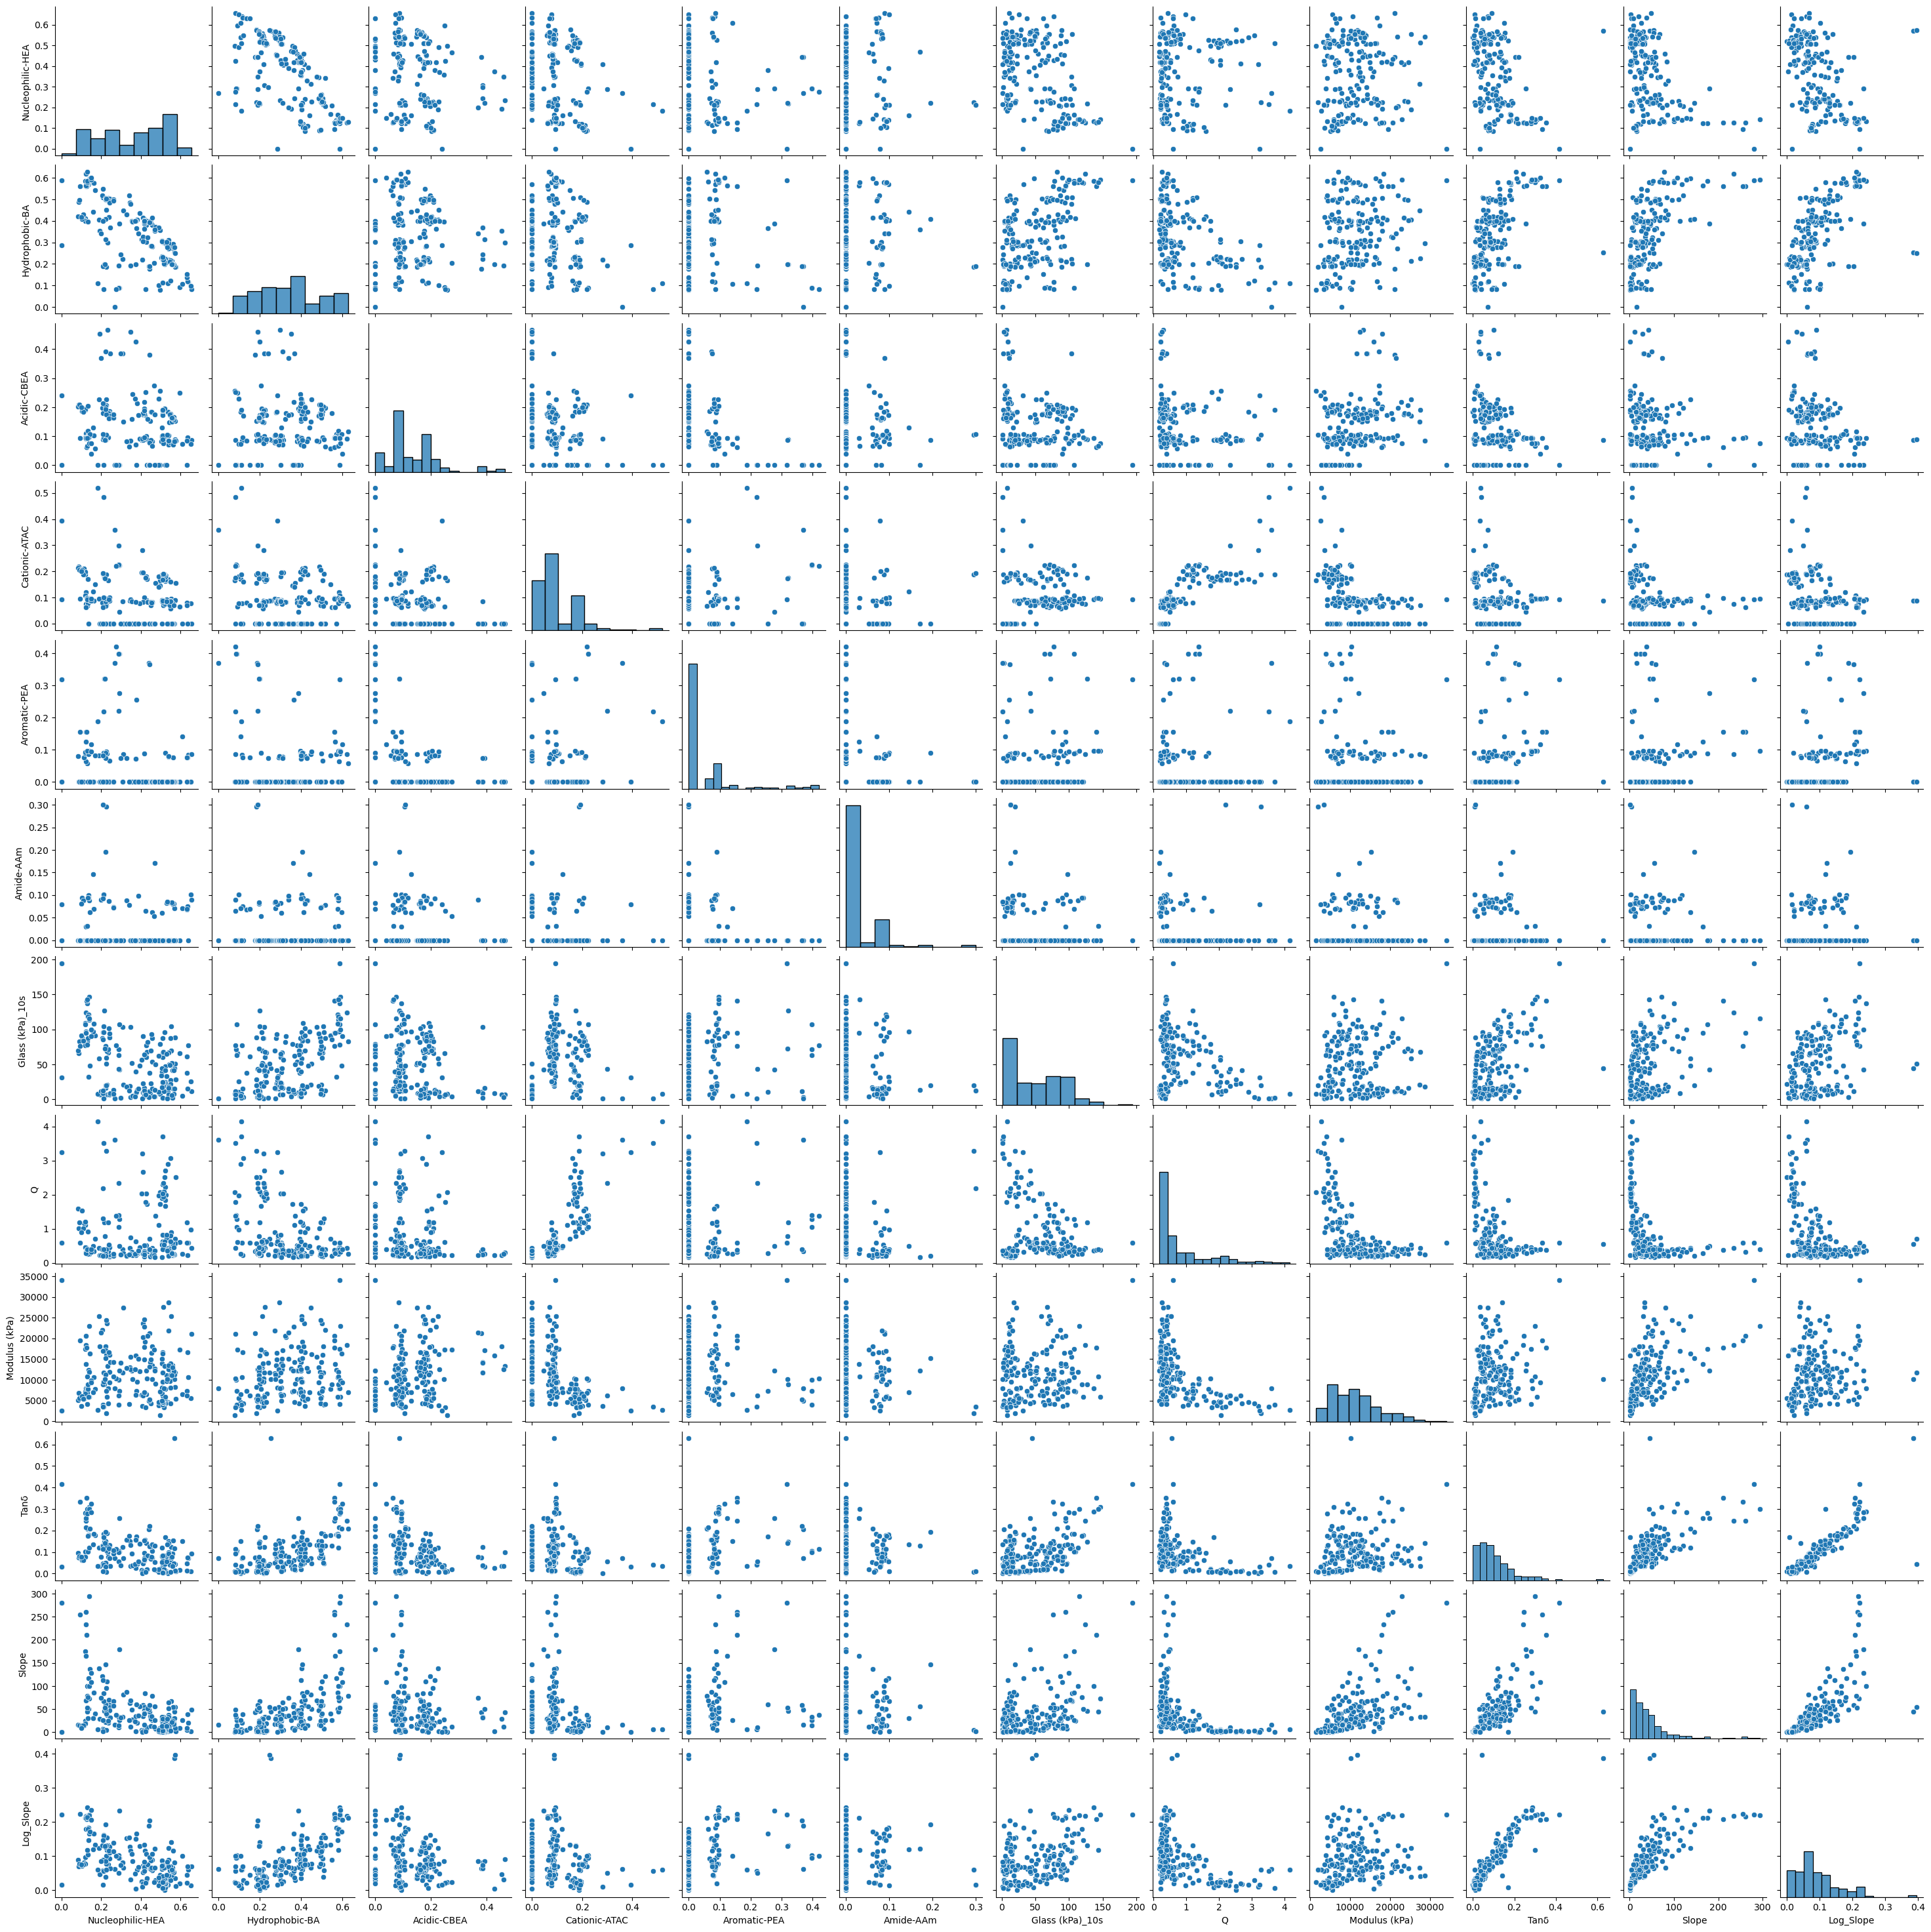

In [ ]:
sns.pairplot(X_all_cov)
plt.savefig('pair_plot_with_X2properties.pdf')

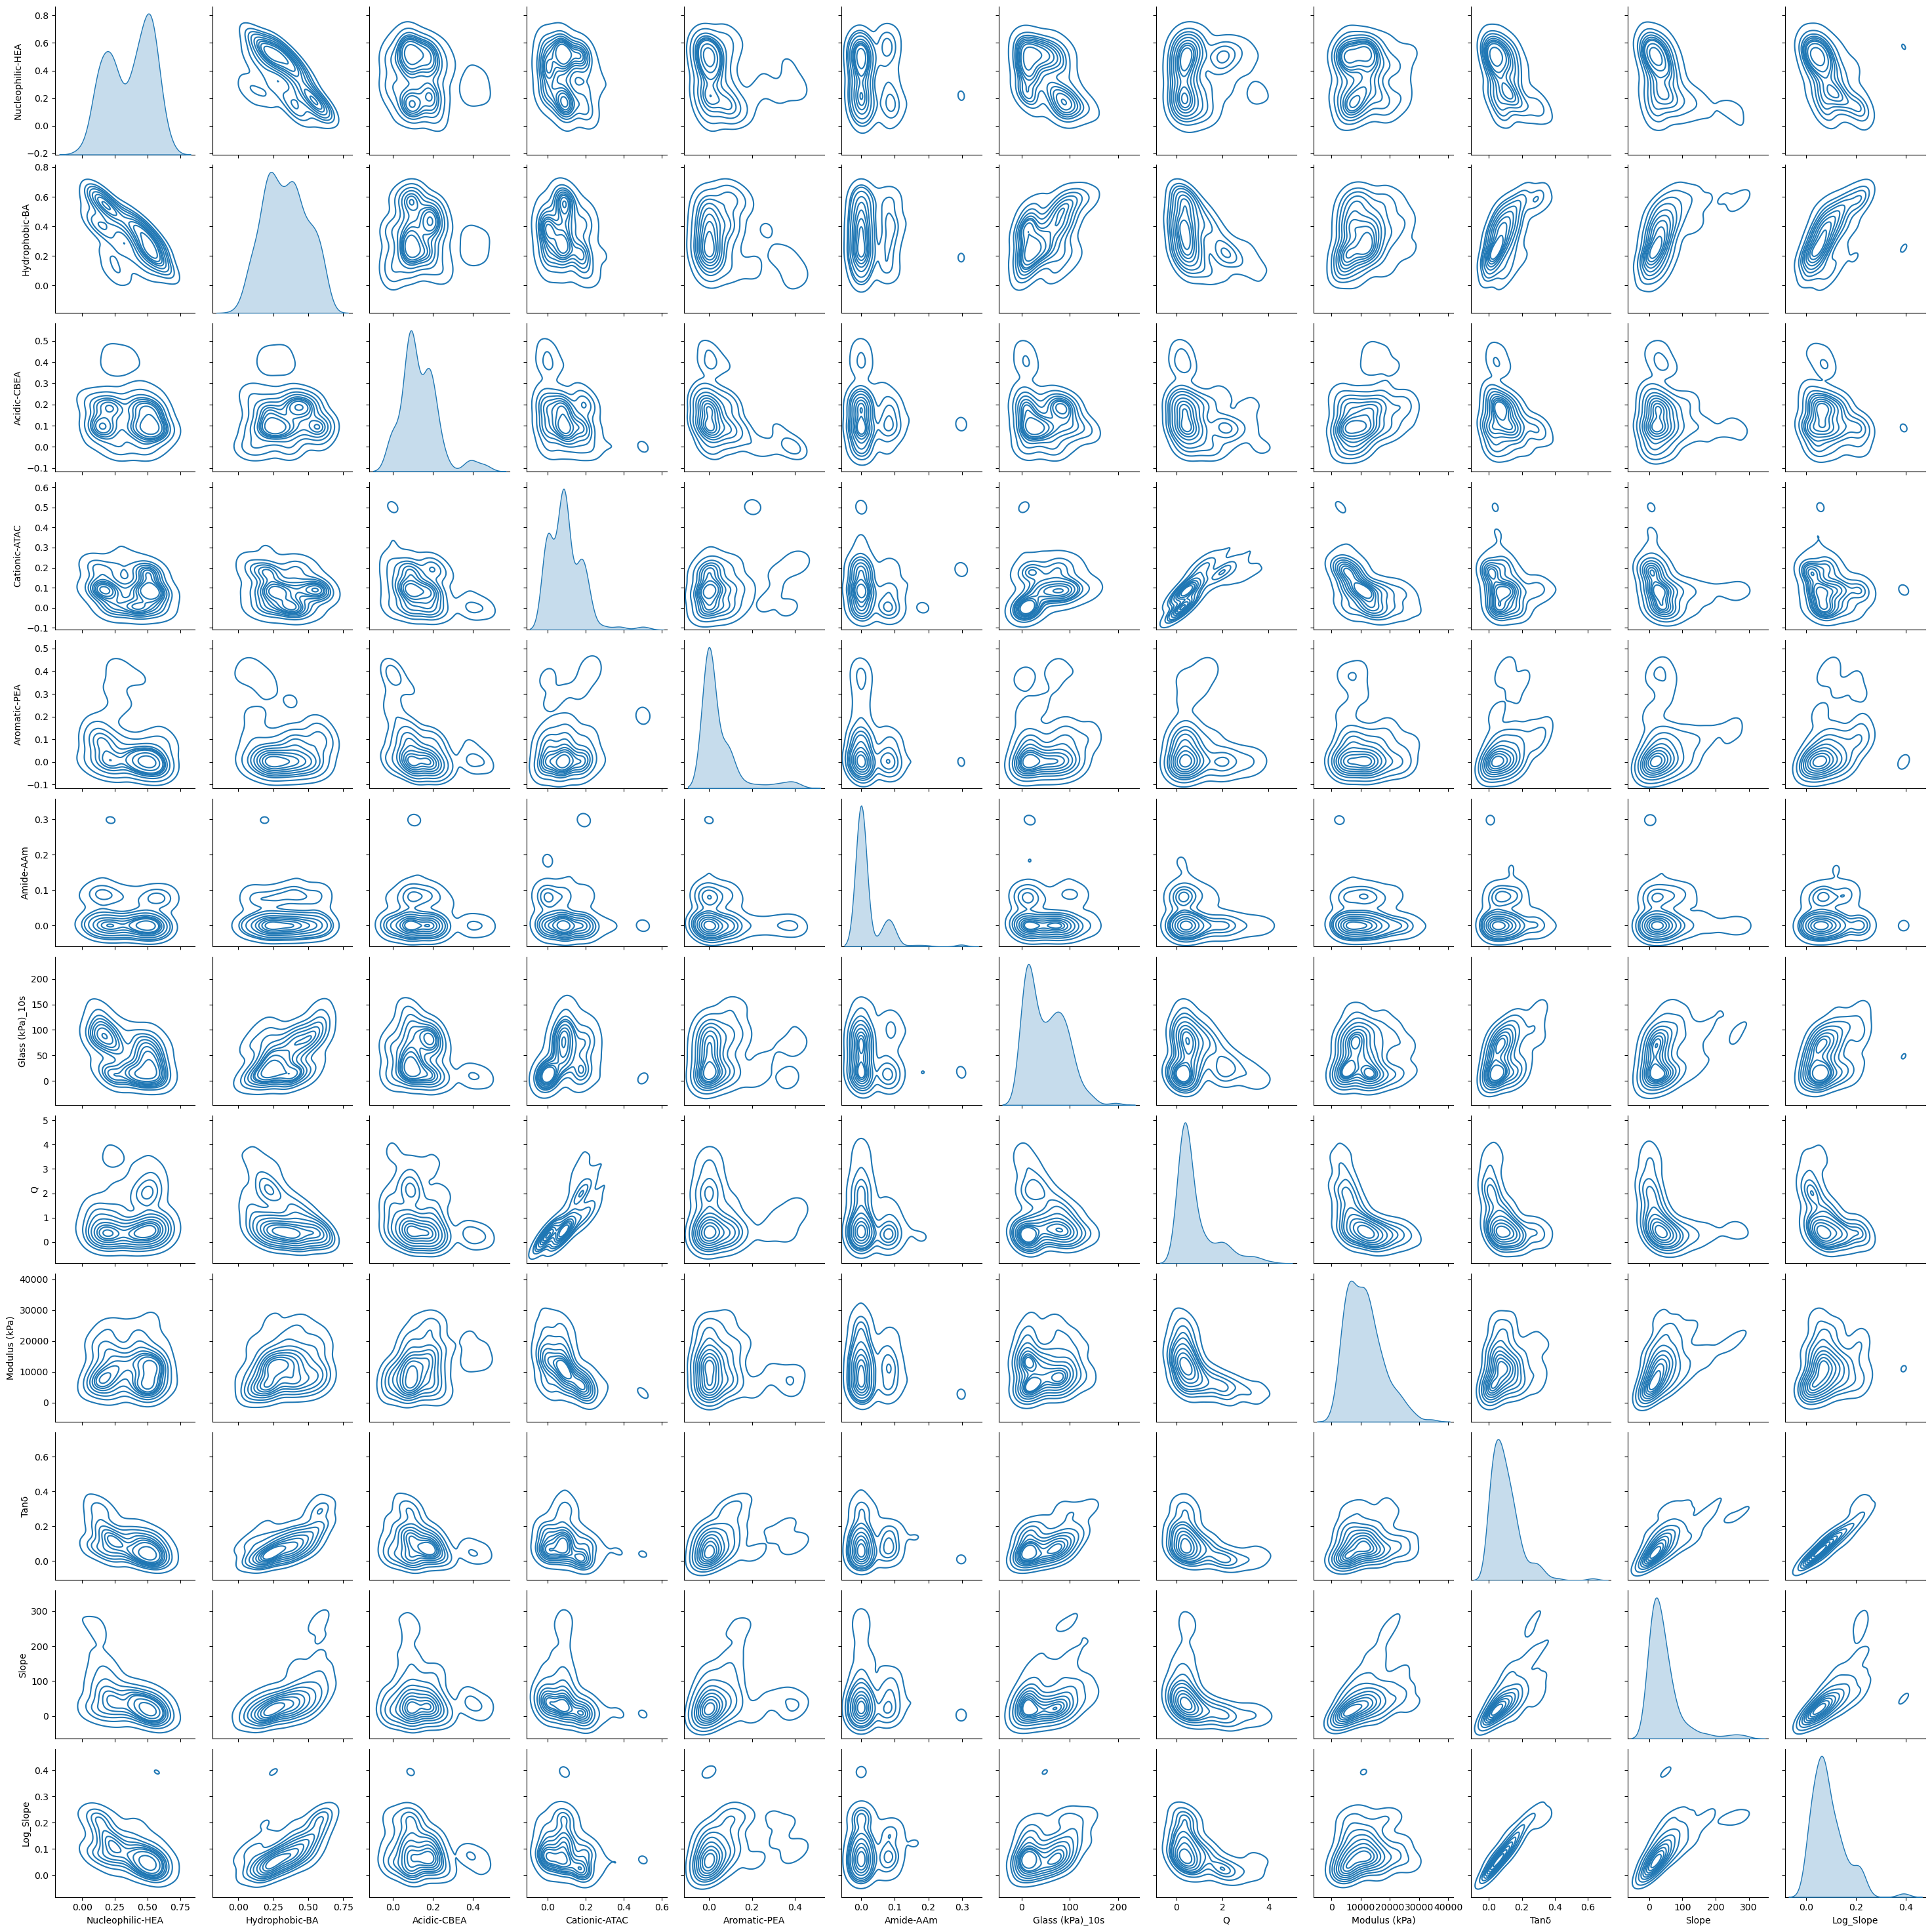

In [ ]:
sns.pairplot(X_all_cov, kind='kde')
plt.savefig('pair_plot_with_X2properties_kde.pdf')

In [ ]:

x_columns = ['Nucleophilic-HEA', 'Hydrophobic-BA', 'Acidic-CBEA', 'Cationic-ATAC',
       'Aromatic-PEA', 'Amide-AAm']
hydrophobic_monomer = ['Hydrophobic-BA', 'Aromatic-PEA']
hydrophilic_monomer = ['Nucleophilic-HEA', 'Acidic-CBEA', 'Cationic-ATAC',
        'Amide-AAm']

### sns.heatmap()

In [ ]:
df['hydrophobic_monomer'] = df[hydrophobic_monomer].sum(axis=1)
df['hydrophilic_monomer'] = df[hydrophilic_monomer].sum(axis=1)

In [ ]:
columns_aggr = ['hydrophilic_monomer', 'hydrophobic_monomer']
columns_aggr.extend(x_columns_cov)

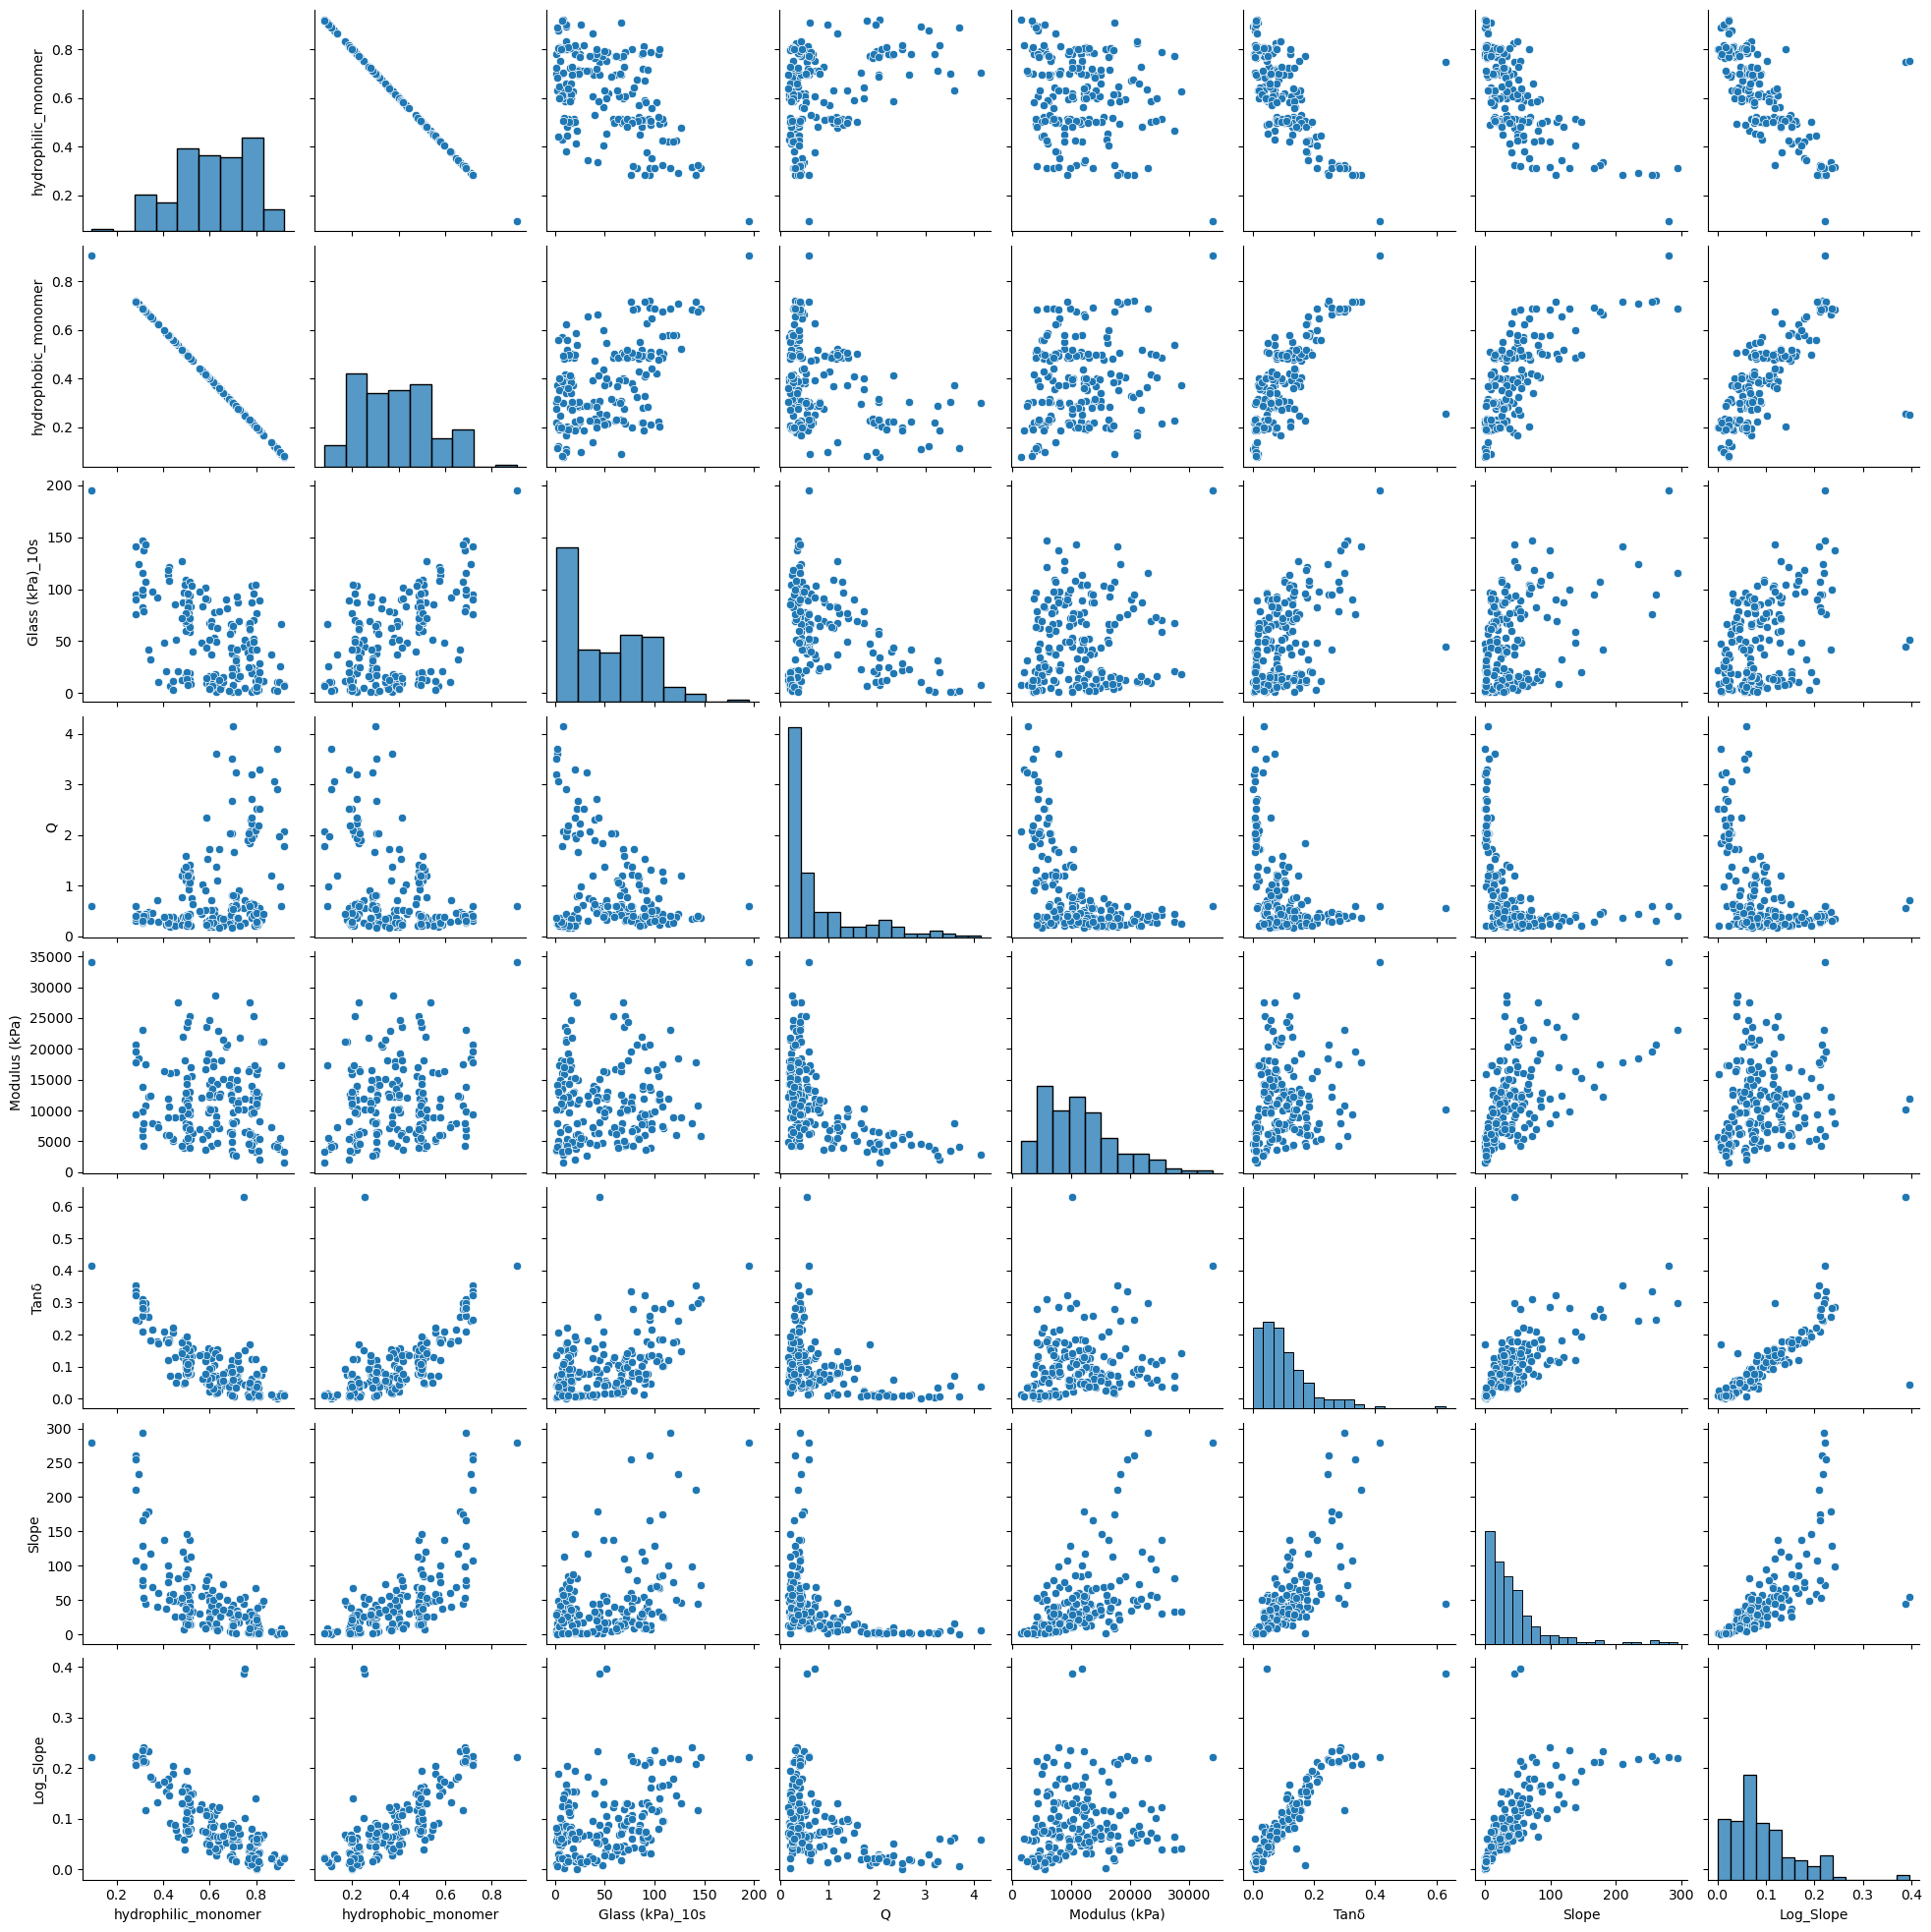

In [ ]:
X_aggr = df[columns_aggr]
sns.pairplot(X_aggr)
plt.savefig('pair_plot_aggrs.pdf')

In [ ]:
X_aggr.corr().style.background_gradient(cmap='coolwarm')

### XLogP3

In [ ]:
import rdkit.Chem.Crippen as Crippen
import rdkit.Chem as Chem
smi = "C=CC(=O)N"
m = Chem.MolFromSmiles(smi)
plogp = Crippen.MolLogP(m)
print(plogp)


-0.3423


### Newdata, 2022130

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_excel("correlation_20221130.xlsx", engine = "openpyxl", na_values='/')
df = df.fillna(value=0)
df.head()

XlogP3  Glass (kPa)_10s         Q  Modulus (kPa)    Tanδ      Slope  \
0 -0.313356        22.363765  2.515456           5599  0.0105   1.000000   
1  0.525224        12.569002  0.238328          19219  0.1573  84.428143   
2 -0.396926        10.927105  2.903806           4555  0.0000   1.907302   
3  0.384595       126.822364  1.191016           8866  0.1480  45.628543   
4  0.304776       109.271054  1.103370           7136  0.1024  25.035012   

   Log_Slope  
0   0.000000  
1   0.116592  
2   0.014942  
3   0.130907  
4   0.095809

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

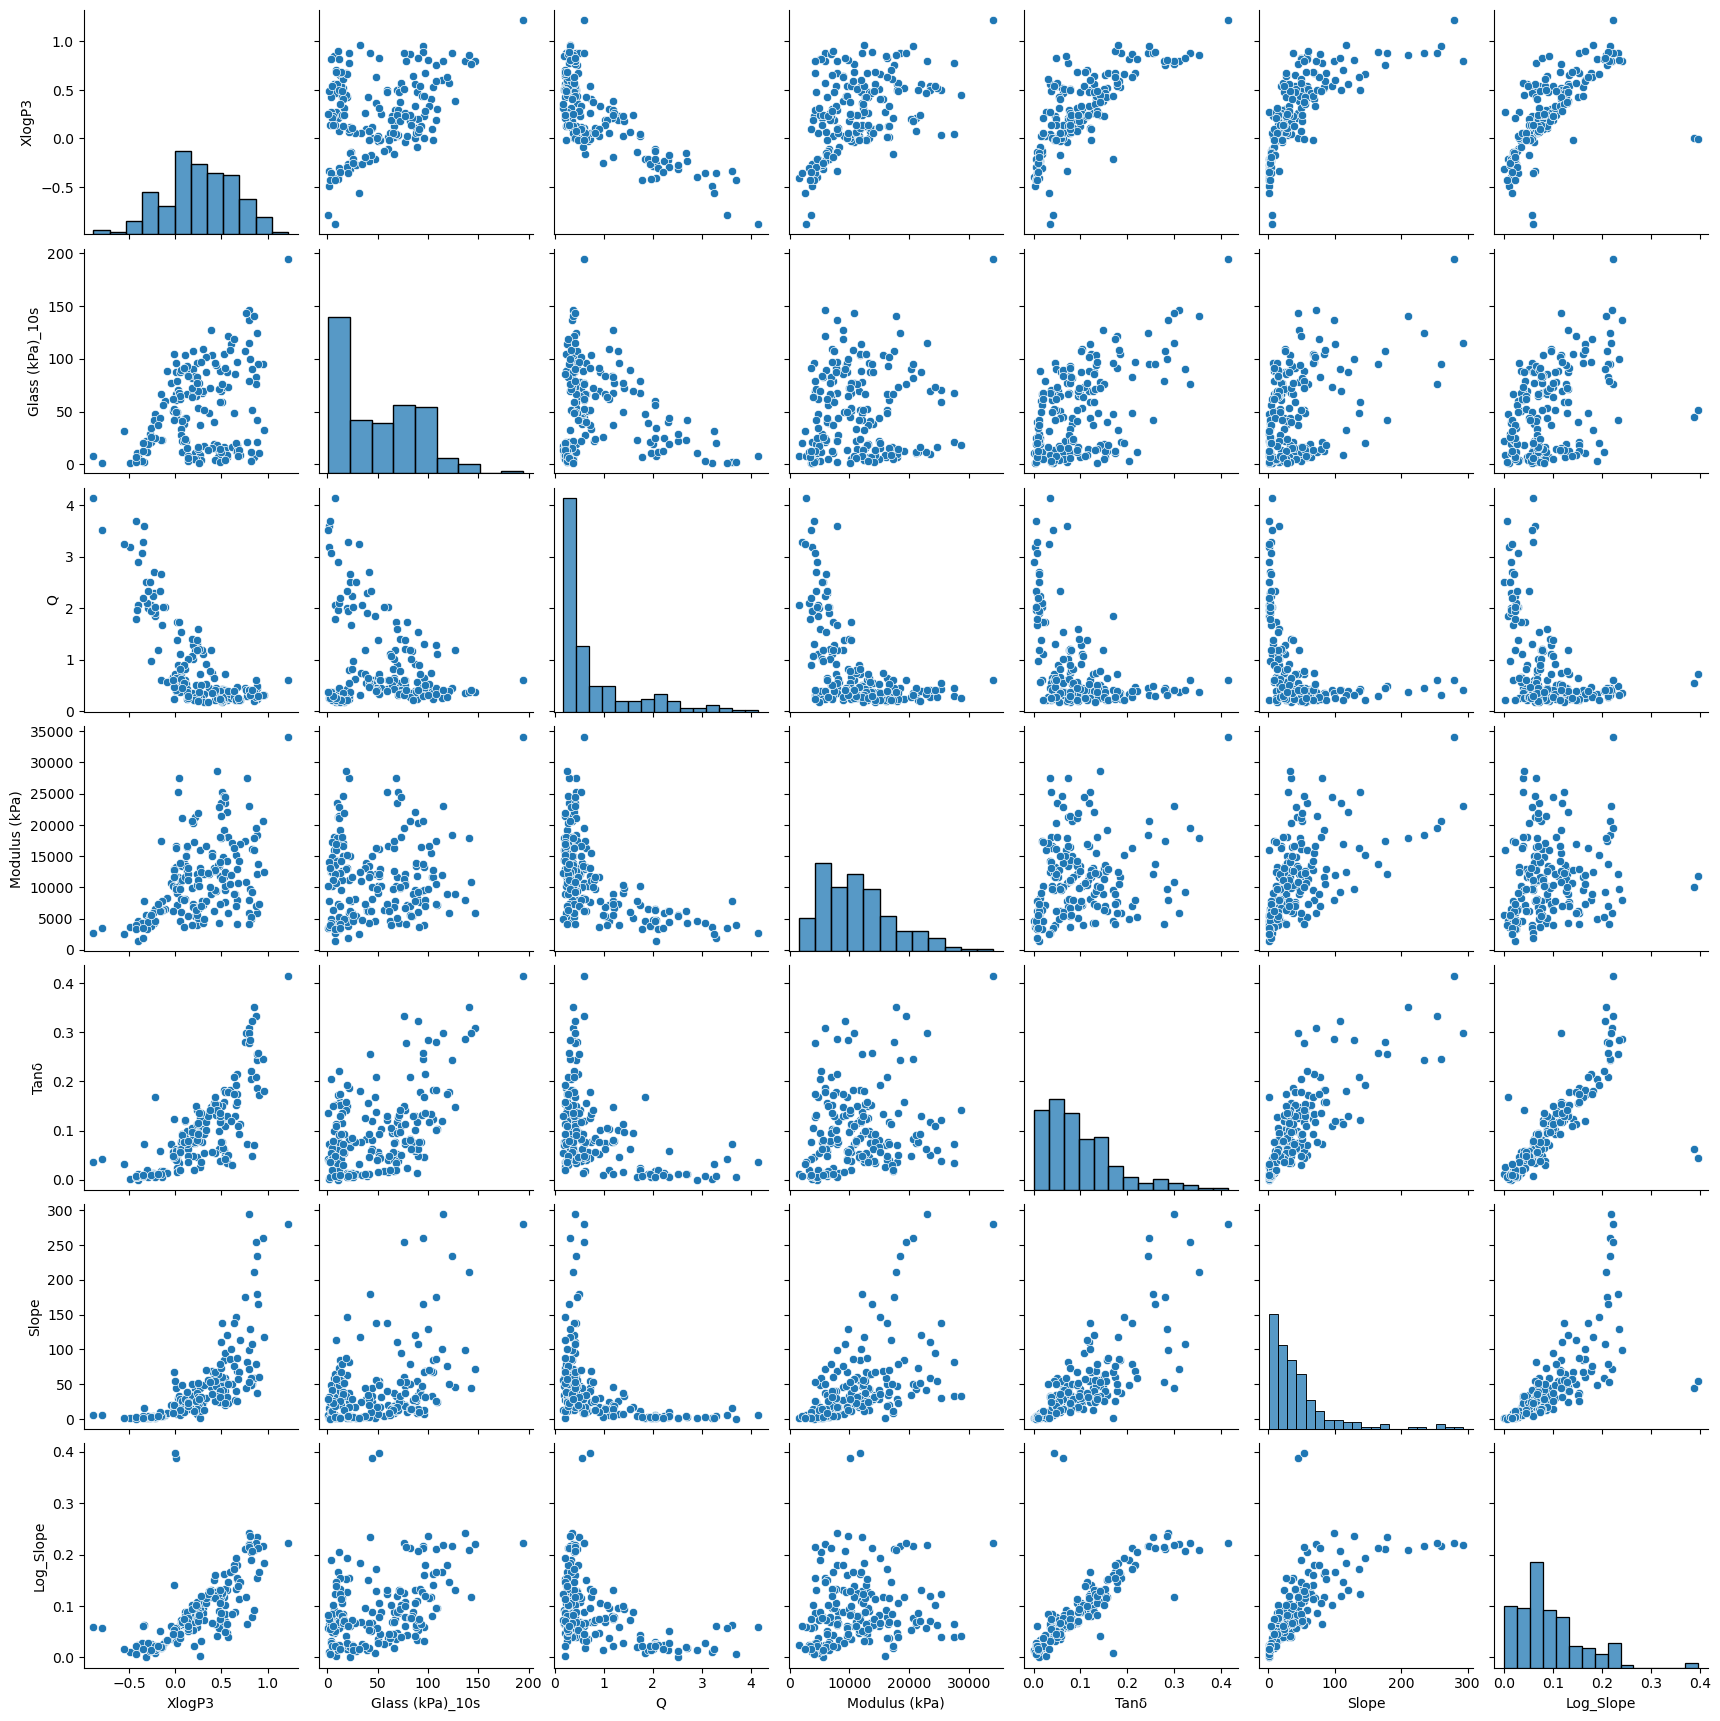

In [ ]:
sns.pairplot(df, kind='scatter')
plt.savefig('xlogp3_pair_plot.pdf')

In [ ]:
plt.isinteractive()
plt.ioff()

In [ ]:
sns.histplot(df['XlogP3'])

<AxesSubplot:xlabel='XlogP3', ylabel='Count'>